In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [351]:
rawdata=pd.read_csv('HW4_house-prices.csv')
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',30)

In [352]:
rawdata.fillna(rawdata.mean())
rawdata.dropna(axis=1,inplace=True)

In [353]:
rawdata=pd.get_dummies(rawdata)

In [354]:
y=rawdata['SalePrice']
X=rawdata.drop(columns='SalePrice')
# std_y=y.copy()
# std_X=X.copy()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [355]:
regr=linear_model.LinearRegression()
rid=linear_model.Ridge()
lso=linear_model.Lasso()

regr.fit(X_train,y_train)
rid.fit(X_train,y_train)
lso.fit(X_train,y_train)

y_pred_regr=regr.predict(X_test)
y_pred_rid=rid.predict(X_test)
y_pred_lso=lso.predict(X_test)


rid_MSE=mean_squared_error(y_test, y_pred_rid,squared=False)
regr_MSE=mean_squared_error(y_test, y_pred_regr,squared=False)
lso_MSE=mean_squared_error(y_test, y_pred_lso,squared=False)
MSE={'regr':regr_MSE,'rid':rid_MSE,'lso':lso_MSE}
min_MSE = min(MSE, key=MSE.get)


# df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# df

/home/heisenberg/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87564043864.85944, tolerance: 615098412.8205525
  model = cd_fast.enet_coordinate_descent(


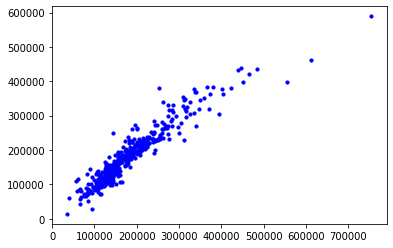

In [356]:
if min_MSE == 'regr':
    plt.scatter(y_test,y_pred_regr,color='blue',s=10)
if min_MSE == 'rid':
    plt.scatter(y_test,y_pred_rid,color='blue',s=10)
if min_MSE == 'lso':
    plt.scatter(y_test,y_pred_lso,color='blue',s=10)
plt.show()

In [357]:
X_train_sc=preprocessing.StandardScaler()
X_test_sc=preprocessing.StandardScaler()
y_train_sc=preprocessing.StandardScaler()
X_train_sc.fit(X_train)
X_test_sc.fit(X_test)
y_train = np.array(y_train).reshape(-1, 1)
y_train_sc.fit(y_train)
std_X_train=X_train_sc.transform(X_train)
std_X_test=X_test_sc.transform(X_test)
std_y_train=y_train_sc.transform(y_train)

regr.fit(std_X_train,std_y_train)
rid.fit(std_X_train,std_y_train)
lso.fit(std_X_train,std_y_train)

std_y_pred_regr=regr.predict(std_X_test)
std_y_pred_rid=rid.predict(std_X_test)
std_y_pred_lso=lso.predict(std_X_test)

std_y_pred_regr=y_train_sc.inverse_transform(std_y_pred_regr)
std_y_pred_rid=y_train_sc.inverse_transform(std_y_pred_rid)
std_y_pred_lso=y_train_sc.inverse_transform(std_y_pred_lso)

std_rid_MSE=mean_squared_error(y_test, std_y_pred_rid,squared=False)
std_regr_MSE=mean_squared_error(y_test, std_y_pred_regr,squared=False)
std_lso_MSE=mean_squared_error(y_test, std_y_pred_lso,squared=False)
std_MSE={'regr':std_regr_MSE,'rid':std_rid_MSE,'lso':std_lso_MSE}
print(MSE)
print(std_MSE)

{'regr': 28041.67651389797, 'rid': 28714.401348718176, 'lso': 27138.174826581882}
{'regr': 3.814764824066993e+16, 'rid': 27095.27540806148, 'lso': 83545.17795000924}
